In [1]:
import pyspark

spark = pyspark.sql.SparkSession.builder\
    .appName('hogwarts')\
    .getOrCreate()

characters = [
    ("Albus Dumbledore", 150),
    ("Minerva McGonagall", 70),
    ("Rubeus Hagrid", 63),
    ("Oliver Wood", 18),
    ("Harry Potter", 12),
    ("Ron Weasley", 12),
    ("Hermione", 13),
    ("Draco Malfoy", None)
]

c_df = spark.createDataFrame(characters, ["name", "age"])    

c_df.show()

21/10/06 00:24:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


+------------------+----+
|              name| age|
+------------------+----+
|  Albus Dumbledore| 150|
|Minerva McGonagall|  70|
|     Rubeus Hagrid|  63|
|       Oliver Wood|  18|
|      Harry Potter|  12|
|       Ron Weasley|  12|
|          Hermione|  13|
|      Draco Malfoy|null|
+------------------+----+



In [4]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession
# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

21/10/06 00:41:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
%%timeit
df = spark.read.csv('Vermont_Vendor_Payments.csv', header=True)

115 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
df = spark.read.csv('Vermont_Vendor_Payments.csv', header='true', inferSchema = True)
df = df.withColumn("Amount", df["Amount"].cast("double"))


In [8]:
columns = df.columns
print('The column Names are:')
for i in columns:
    print(i)

The column Names are:
Quarter Ending
Department
UnitNo
Vendor Number
Vendor
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund


In [9]:
df.show()

+--------------+--------------------+------+-------------+--------------------+------------+-----+--------------------+----------+---------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|Vendor Number|              Vendor|        City|State|  DeptID Description|    DeptID|   Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+------------+-----+--------------------+----------+---------+--------------------+------+--------------------+-----+
|    12/31/2019|Vt Housing & Cons...|  9150|   0000002188|Vermont Housing &...|  Montpelier|   VT|               Trust|9150120000|1075000.0|Transfer Out - Co...|720010|Housing & Conserv...|90610|
|    12/31/2019|Vt Housing & Cons...|  9150|   0000375660|Wagner Developmen...| Brattleboro|   VT|             VT REDI|9150293000|   4612.5|Other Direct Gran...|552990|Housing & Conserv...|90610|
|    12/31/2019|Vt H

In [11]:
#create temp table
df.createOrReplaceTempView('VermontVendor')
spark.sql('''SELECT 'Quarter Ending', Department, Amount, State FROM VermontVendor limit 20


''').show()

+--------------+--------------------+---------+-----+
|Quarter Ending|          Department|   Amount|State|
+--------------+--------------------+---------+-----+
|Quarter Ending|Vt Housing & Cons...|1075000.0|   VT|
|Quarter Ending|Vt Housing & Cons...|   4612.5|   VT|
|Quarter Ending|Vt Housing & Cons...|112916.67|   VT|
|Quarter Ending|Vt Housing & Cons...| 17152.74|   VT|
|Quarter Ending|Vt Housing & Cons...|   4850.0|   VT|
|Quarter Ending|Vt Housing & Cons...|   1755.0|   VT|
|Quarter Ending|Vt Housing & Cons...| 26837.54|   VT|
|Quarter Ending|Vt Housing & Cons...| 30396.35|   VT|
|Quarter Ending|Vt Housing & Cons...|  5430.17|   VT|
|Quarter Ending|Vt Housing & Cons...|   1000.0|   VT|
|Quarter Ending|Vt Housing & Cons...|    787.5|   VT|
|Quarter Ending|Vt Housing & Cons...|  1233.32|   VT|
|Quarter Ending|Vt Housing & Cons...| 82819.24|   VT|
|Quarter Ending|Vt Housing & Cons...| 88205.25|   VT|
|Quarter Ending|Vt Housing & Cons...| 116250.0|   VT|
|Quarter Ending|Vt Housing &

In [12]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').show(10)

+--------------+--------------------+---------+-----+
|Quarter Ending|          Department|   Amount|State|
+--------------+--------------------+---------+-----+
|    12/31/2019|Vt Housing & Cons...|1075000.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   4612.5|   VT|
|    12/31/2019|Vt Housing & Cons...|112916.67|   VT|
|    12/31/2019|Vt Housing & Cons...| 17152.74|   VT|
|    12/31/2019|Vt Housing & Cons...|   4850.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   1755.0|   VT|
|    12/31/2019|Vt Housing & Cons...| 26837.54|   VT|
|    12/31/2019|Vt Housing & Cons...| 30396.35|   VT|
|    12/31/2019|Vt Housing & Cons...|  5430.17|   VT|
|    12/31/2019|Vt Housing & Cons...|   1000.0|   VT|
+--------------+--------------------+---------+-----+
only showing top 10 rows



In [13]:
# spark dataframe not compatible with Python Pandas.
plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 20
'''
).toPandas()

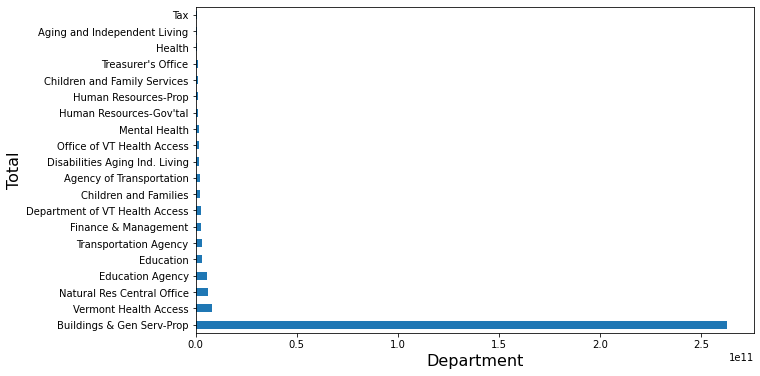

In [14]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
plt.savefig('barplot.png')
plt.show()